In [1]:
import webuiapi

# api = webuiapi.WebUIApi()
api = webuiapi.WebUIApi(host='127.0.0.1',
                        port=7860,
                        sampler='Euler a',
                        steps=20)

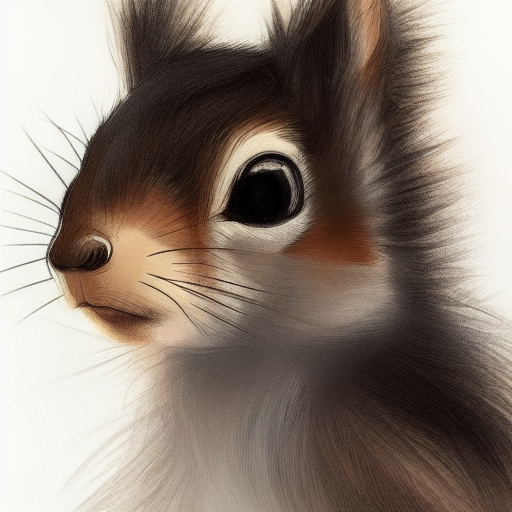

In [2]:
# img2txt

result1 = api.txt2img(prompt="cute squirrel",
                    negative_prompt="ugly, out of frame",
                    seed=1003,
                    styles=["anime"],
                    cfg_scale=7,
#                      sampler_index='DDIM',
#                      steps=30,
                    )
result1.image

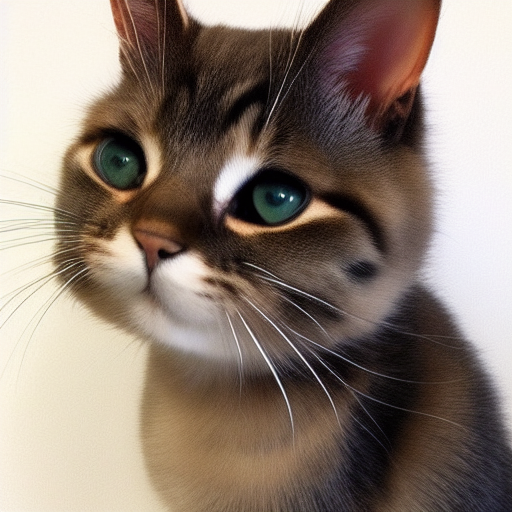

In [3]:
# img2img

result2 = api.img2img(images=[result1.image], prompt="cute cat", seed=5555, cfg_scale=6.5, denoising_strength=0.6)
result2.image

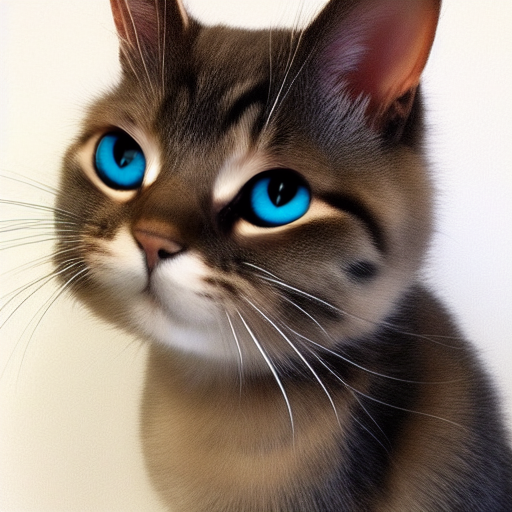

In [4]:
# inpainting with img2img

from PIL import Image, ImageDraw

mask = Image.new('RGB', result2.image.size, color = 'black')
# mask = result2.image.copy()
draw = ImageDraw.Draw(mask)
draw.ellipse((210,150,310,250), fill='white')
draw.ellipse((80,120,160,120+80), fill='white')

# mask

inpainting_result = api.img2img(images=[result2.image],
                                mask_image=mask,
                                inpainting_fill=1,
                                prompt="cute cat",
                                seed=104,
                                cfg_scale=5.0,
                                denoising_strength=0.7)
inpainting_result.image

(768, 768)


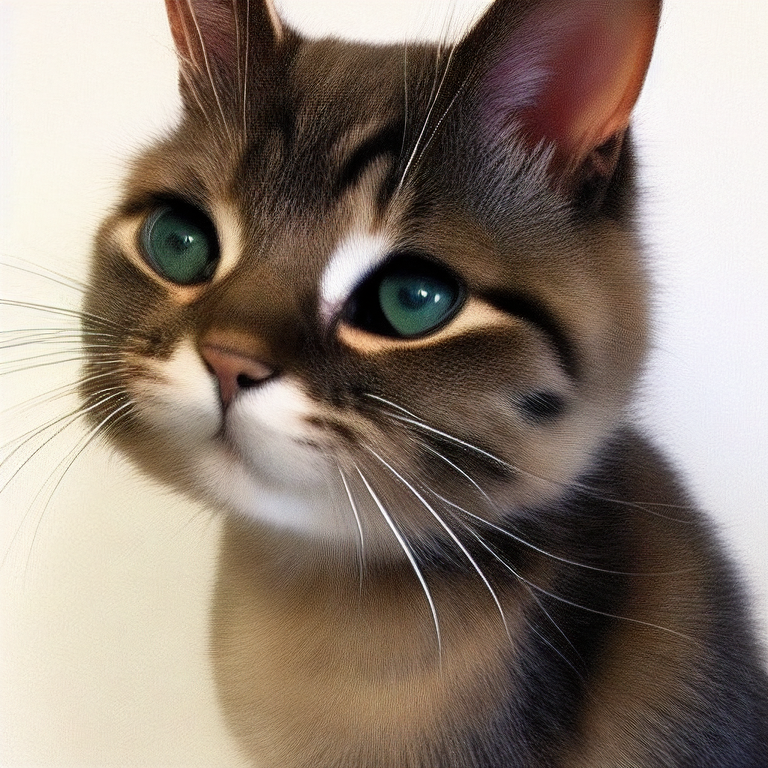

In [5]:
result3 = api.extra_single_image(image=result2.image,
                                 upscaler_1="ESRGAN_4x",
                                 upscaling_resize=1.5)
print(result3.image.size)
result3.image

In [6]:
result4 = api.extra_batch_images(images=[result1.image, result2.image],
                                 upscaler_1="ESRGAN_4x",
                                 upscaling_resize=1.5)
len(result4.images)

2

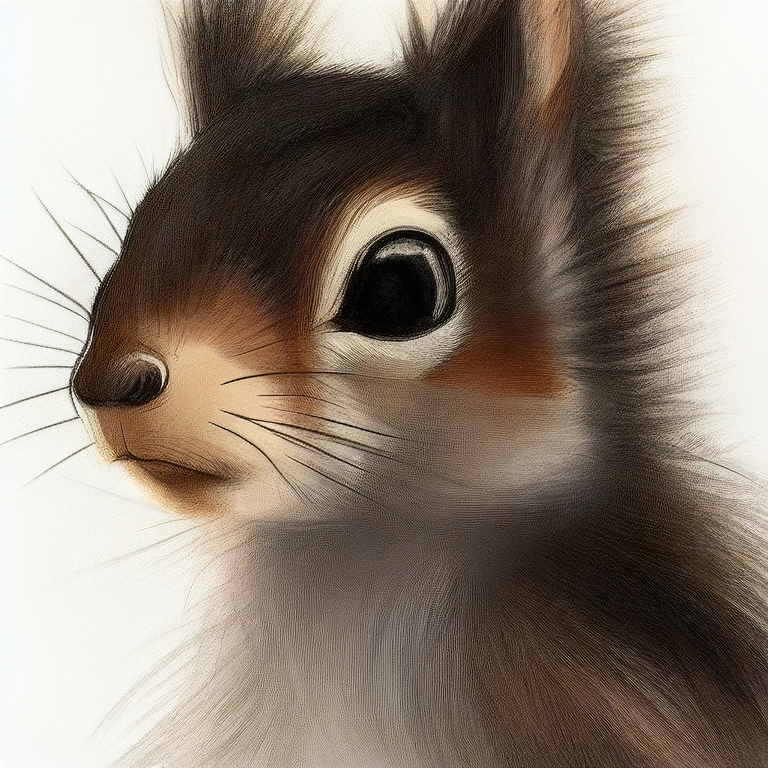

In [7]:
result4.images[0]

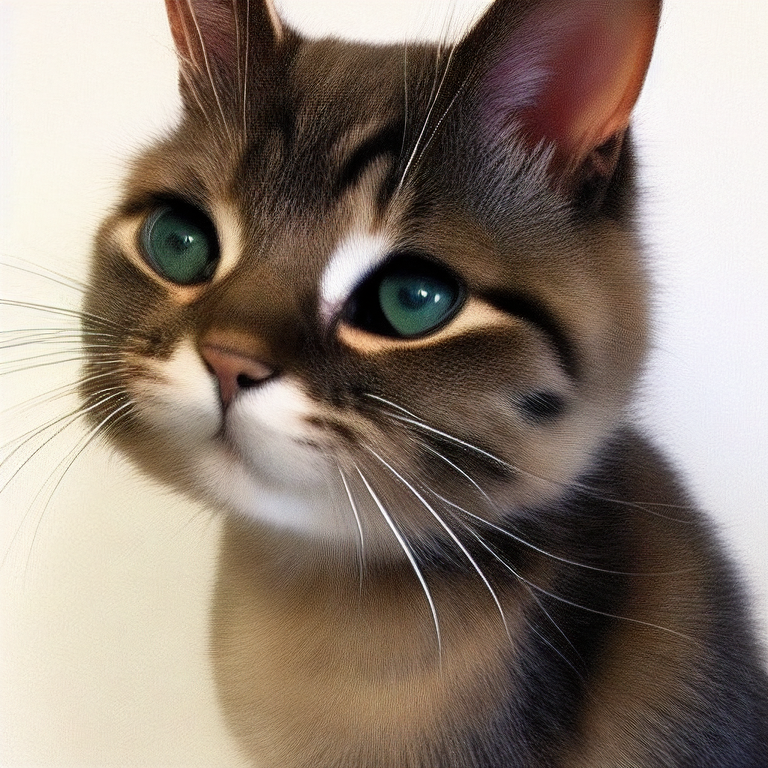

In [8]:
result4.images[1]